In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_cu = ["10K","100K","20K","200K","50K"]
def prepare(filepath):
    width = 128
    ima = cv2.imread(filepath)
    new_img = cv2.resize(ima,(width,width))
    new_img = new_img.astype('float')*1./255
    new_img = np.expand_dims(new_img, axis=0)
    
    return new_img

In [10]:
# load model
# model = tf.keras.models.load_model("best_weight/weights-94-0.84.hdf5")
model = tf.keras.models.load_model("models/model_SV.h5")


pred = model.predict([prepare('tien2ka.jpg')])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [4]:
pred

array([[0.00975727, 0.7257448 , 0.23934862, 0.02306229, 0.00208699]],
      dtype=float32)

200K 58.22201371192932


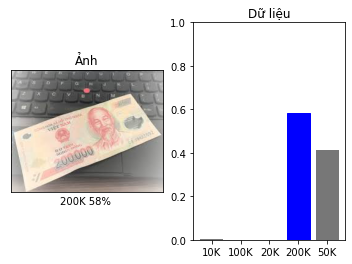

In [11]:
img= mpimg.imread('tien2ka.jpg')
print(class_cu[np.argmax(pred[0])],100 * np.max(pred[0]))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Ảnh')
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ".format(class_cu[np.argmax(pred[0])],
                                          100 * np.max(pred[0])))


ax = fig.add_subplot(1, 2, 2)
ax.set_title('Dữ liệu')
thisplot = plt.bar(class_cu, pred[0], color="#777777" )
plt.ylim([0, 1])
predicted_label = np.argmax(pred[0])
thisplot[predicted_label].set_color('blue')

    
plt.show()